# Import The Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

## Read The Dataset

In [2]:
df=pd.read_csv('HeatDemand.csv')
X = df.iloc[:,1:9]
y = df['DH:District Heating Inlet Temperature [C](TimeStep:ON)']
df.head()


,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep),Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep),TZ_001:Zone People Occupant Count [](TimeStep:ON),TZ_001:Zone People Sensible Heating Rate [W](TimeStep),TZ_001:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep),DH:District Heating Hot Water Energy [KJ](TimeStep:ON),DH:District Heating Hot Water Rate [KW](TimeStep:ON),DH:District Heating Inlet Temperature [C](TimeStep:ON)
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61


# Split The Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Evaluate Number Of Clusters
Number of clusters are calculated using the Elbow method

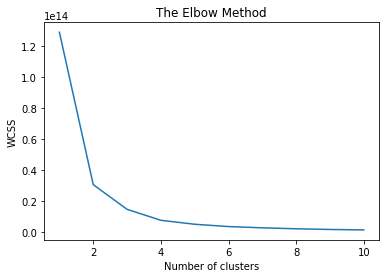

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

# K-means Clusters 

Cluster of training dataset

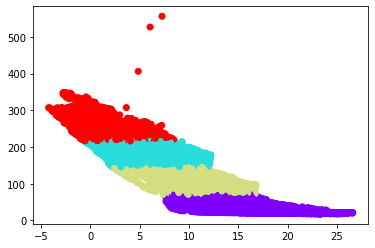

In [9]:
plt.scatter(X_train['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_train['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_kmeans, cmap='rainbow')

In [10]:
y_k = kmeans.fit_predict(X_test)

# Predicted Clusters


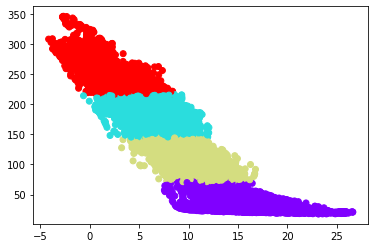

In [11]:
plt.scatter(X_test['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_test['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_k, cmap='rainbow')

# Problem K-means
Evaluation of accuracy is very difficult of K-Means method

In [12]:

knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

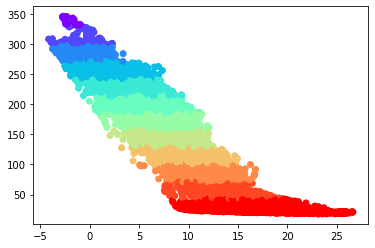

In [35]:
y_pred = knn.predict(X_test)
plt.scatter(X_test['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_test['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_pred, cmap='rainbow')

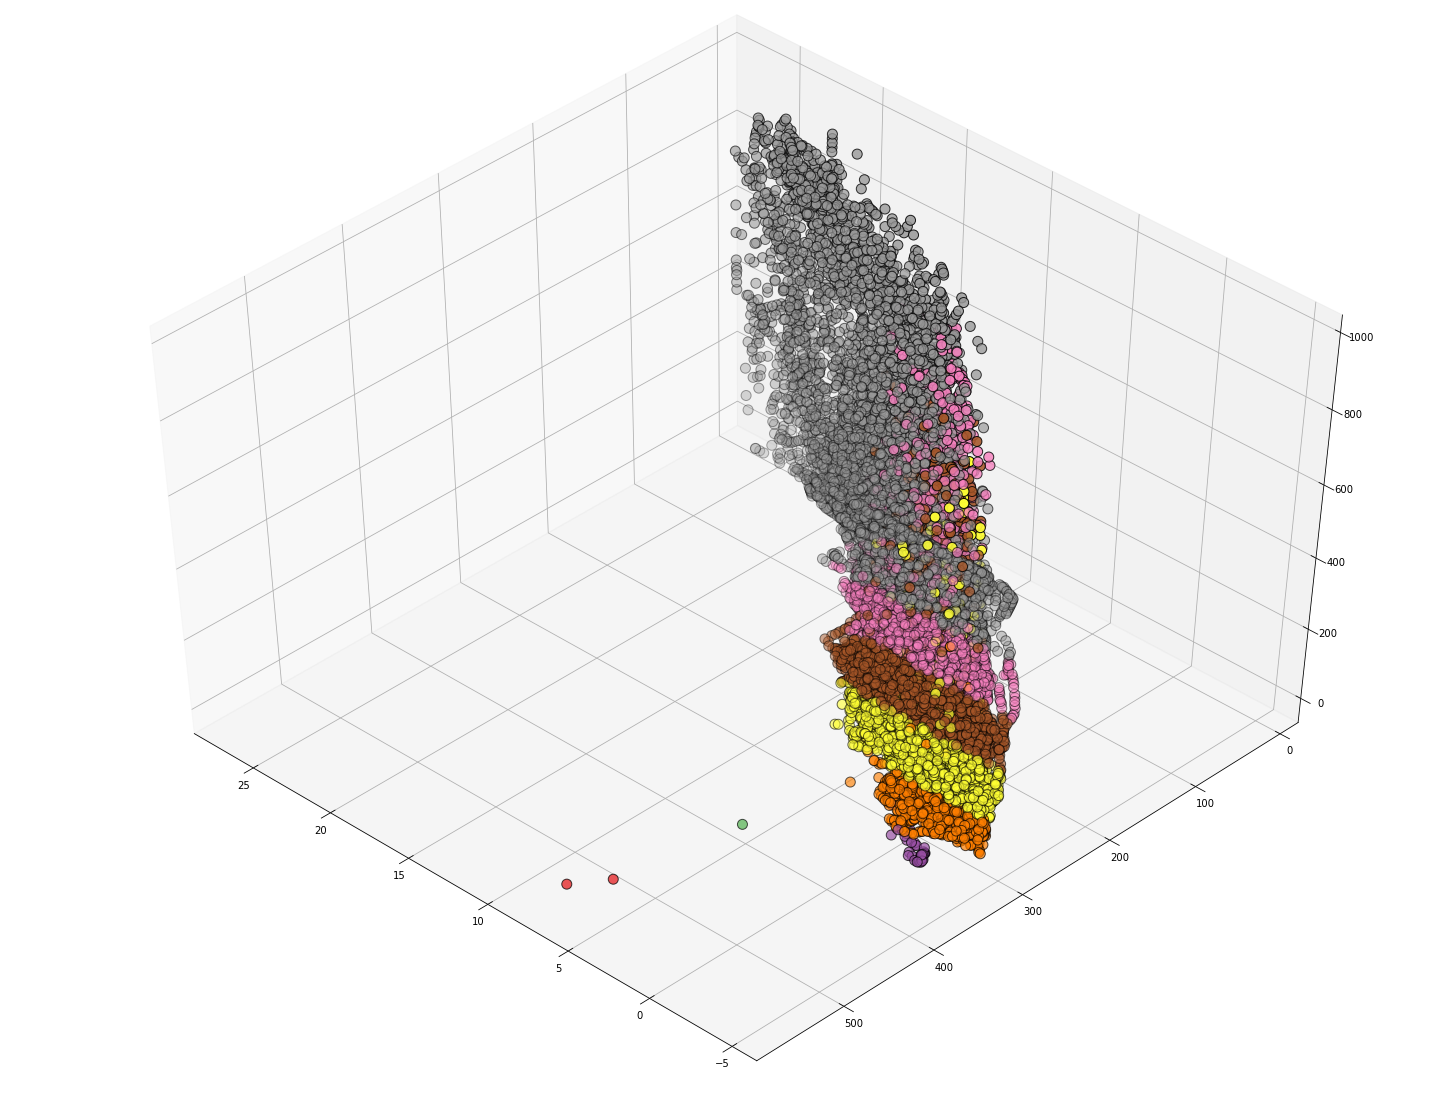

In [38]:

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X_train['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_train['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], X_train['Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)'], c = y_train , cmap=plt.cm.Set1, edgecolor='k',s=100)


In [ ]:

Confusion_Matrix=confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)

In [ ]:
confusion_matrix

In [ ]:

accuracy_score(y_test, y_pred)

In [ ]:

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:

accuracy_score(y_test, predictions)